In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../csv/competitions.csv')
df.head()

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url
0,CIT,italy-cup,italy-cup,domestic_cup,domestic_cup,75,Italy,IT1,europa,https://www.transfermarkt.co.uk/italy-cup/star...
1,NLSC,johan-cruijff-schaal,johan-cruijff-schaal,domestic_super_cup,other,122,Netherlands,NL1,europa,https://www.transfermarkt.co.uk/johan-cruijff-...
2,GRP,kypello-elladas,kypello-elladas,domestic_cup,domestic_cup,56,Greece,GR1,europa,https://www.transfermarkt.co.uk/kypello-ellada...
3,POSU,supertaca-candido-de-oliveira,supertaca-candido-de-oliveira,domestic_super_cup,other,136,Portugal,PO1,europa,https://www.transfermarkt.co.uk/supertaca-cand...
4,RUSS,russian-super-cup,russian-super-cup,domestic_super_cup,other,141,Russia,RU1,europa,https://www.transfermarkt.co.uk/russian-super-...


### Step 1: Data Understanding ###
+ Dataframe shape
+ head and tail
+ dtypes
+ describe

In [4]:
df.shape

(43, 10)

In [5]:
df.head(5)

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url
0,CIT,italy-cup,italy-cup,domestic_cup,domestic_cup,75,Italy,IT1,europa,https://www.transfermarkt.co.uk/italy-cup/star...
1,NLSC,johan-cruijff-schaal,johan-cruijff-schaal,domestic_super_cup,other,122,Netherlands,NL1,europa,https://www.transfermarkt.co.uk/johan-cruijff-...
2,GRP,kypello-elladas,kypello-elladas,domestic_cup,domestic_cup,56,Greece,GR1,europa,https://www.transfermarkt.co.uk/kypello-ellada...
3,POSU,supertaca-candido-de-oliveira,supertaca-candido-de-oliveira,domestic_super_cup,other,136,Portugal,PO1,europa,https://www.transfermarkt.co.uk/supertaca-cand...
4,RUSS,russian-super-cup,russian-super-cup,domestic_super_cup,other,141,Russia,RU1,europa,https://www.transfermarkt.co.uk/russian-super-...


In [6]:
df.dtypes

competition_id          object
competition_code        object
name                    object
sub_type                object
type                    object
country_id               int64
country_name            object
domestic_league_code    object
confederation           object
url                     object
dtype: object

In [7]:
df.columns

Index(['competition_id', 'competition_code', 'name', 'sub_type', 'type',
       'country_id', 'country_name', 'domestic_league_code', 'confederation',
       'url'],
      dtype='object')

+ competition_id: A unique identifier for each competition.
+ competition_code: A code or abbreviation representing each competition.
+ name: The name of the competition.
+ sub_type: The subtype or category of the competition, providing additional classification beyond just the name. For example, "domestic cup" or "domestic super cup".
+ type: The type of competition, such as "domestic cup", "domestic super cup", or other categories.
+ country_id: A unique identifier for the country associated with the competition.
+ country_name: The name of the country associated with the competition.
+ domestic_league_code: A code or identifier specific to domestic leagues within each country, which might be used to distinguish between different competitions within the same country.
+ confederation: The confederation or governing body associated with the competition, indicating its broader organizational affiliation.
+ url: The URL link to access more information about the competition, potentially leading to details such as schedules, results, and standings.

In [8]:
df.describe()

,country_id
count,43.000000
mean,97.093023
std,69.766896
min,-1.000000
25%,39.500000
50%,122.000000
75%,157.000000
max,190.000000


### Step 2: Data Preperation ###
+ Dropping irrelevant columns and rows
+ Identifying duplicated columns
+ Feature Creation 

In [9]:
# Dropping irrelevant columns
df = df[['competition_id', 'competition_code', 'name', 'sub_type', 'type',
       'country_id', 'country_name', 'domestic_league_code', 'confederation',
       #'url'
]]
df

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation
0,CIT,italy-cup,italy-cup,domestic_cup,domestic_cup,75,Italy,IT1,europa
1,NLSC,johan-cruijff-schaal,johan-cruijff-schaal,domestic_super_cup,other,122,Netherlands,NL1,europa
2,GRP,kypello-elladas,kypello-elladas,domestic_cup,domestic_cup,56,Greece,GR1,europa
3,POSU,supertaca-candido-de-oliveira,supertaca-candido-de-oliveira,domestic_super_cup,other,136,Portugal,PO1,europa
4,RUSS,russian-super-cup,russian-super-cup,domestic_super_cup,other,141,Russia,RU1,europa
5,SUC,supercopa,supercopa,domestic_super_cup,other,157,Spain,ES1,europa
6,USC,uefa-super-cup,uefa-super-cup,uefa_super_cup,other,-1,NaN,NaN,europa
7,DK1,superligaen,superligaen,first_tier,domestic_league,39,Denmark,DK1,europa
8,EL,europa-league,europa-league,europa_league,international_cup,-1,NaN,NaN,europa
9,ES1,laliga,laliga,first_tier,domestic_league,157,Spain,ES1,europa


In [10]:
# Identifying duplicated columns
df.duplicated().sum()

0

In [11]:
df.isna().sum()
# df.loc[df.duplicated()]

competition_id          0
competition_code        0
name                    0
sub_type                0
type                    0
country_id              0
country_name            7
domestic_league_code    7
confederation           0
dtype: int64

In [12]:
# number of country_id that is -1
df.loc[df['country_id'] == -1]

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation
6,USC,uefa-super-cup,uefa-super-cup,uefa_super_cup,other,-1,NaN,NaN,europa
8,EL,europa-league,europa-league,europa_league,international_cup,-1,NaN,NaN,europa
17,ELQ,europa-league-qualifikation,europa-league-qualifikation,europa_league_qualifying,international_cup,-1,NaN,NaN,europa
20,ECLQ,uefa-europa-conference-league-qualifikation,uefa-europa-conference-league-qualifikation,uefa_europa_conference_league_qualifiers,international_cup,-1,NaN,NaN,europa
26,CL,uefa-champions-league,uefa-champions-league,uefa_champions_league,international_cup,-1,NaN,NaN,europa
31,KLUB,fifa-klub-wm,fifa-klub-wm,fifa_club_world_cup,other,-1,NaN,NaN,europa
37,CLQ,uefa-champions-league-qualifikation,uefa-champions-league-qualifikation,uefa_champions_league_qualifying,international_cup,-1,NaN,NaN,europa


In [13]:
# check if competition_id is unique
df['competition_id'].nunique() == df.shape[0]

True

### Step 3: Feature Understanding ###
+ My questions
       + What are the different types of competitions?
       + How many sub_types are there in each type?
       + How many competitions are there in each country?
       + How many competitions are there in each confederation?
       + What are the different types of competitions in each country?
       + How many different types of competitions are there in each country?
+ Plotting Feature Distributions
       + Histogram

In [14]:
# What are the different types of competitions?
df['type'].value_counts()

type
domestic_league      14
other                13
domestic_cup         11
international_cup     5
Name: count, dtype: int64

<Axes: title={'center': 'Number of Competitions in Each Type'}, xlabel='type'>

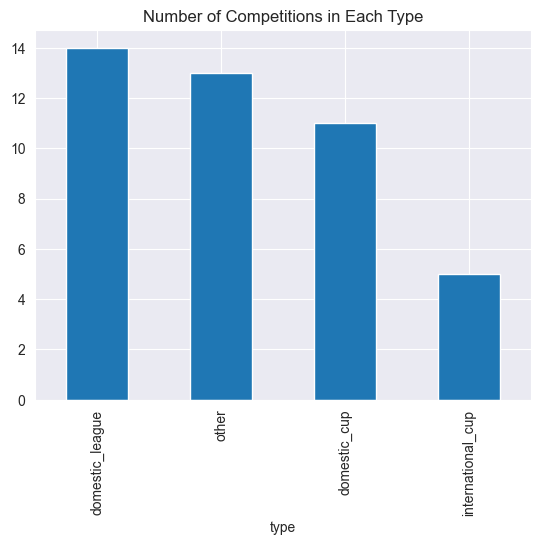

In [15]:
df['type'].value_counts().plot(kind='bar', title='Number of Competitions in Each Type')

In [16]:
df['sub_type'].value_counts()

sub_type
first_tier                                  14
domestic_cup                                11
domestic_super_cup                          10
uefa_super_cup                               1
europa_league                                1
europa_league_qualifying                     1
league_cup                                   1
uefa_europa_conference_league_qualifiers     1
uefa_champions_league                        1
fifa_club_world_cup                          1
uefa_champions_league_qualifying             1
Name: count, dtype: int64

In [17]:
df['sub_type'].unique()

array(['domestic_cup', 'domestic_super_cup', 'uefa_super_cup',
       'first_tier', 'europa_league', 'europa_league_qualifying',
       'league_cup', 'uefa_europa_conference_league_qualifiers',
       'uefa_champions_league', 'fifa_club_world_cup',
       'uefa_champions_league_qualifying'], dtype=object)

In [18]:
# How many sub_types are there in each type?
subtypes_per_type = df.groupby('type')['sub_type'].nunique()
df.groupby('type')['sub_type'].value_counts()

type               sub_type                                
domestic_cup       domestic_cup                                11
domestic_league    first_tier                                  14
international_cup  europa_league                                1
                   europa_league_qualifying                     1
                   uefa_champions_league                        1
                   uefa_champions_league_qualifying             1
                   uefa_europa_conference_league_qualifiers     1
other              domestic_super_cup                          10
                   fifa_club_world_cup                          1
                   league_cup                                   1
                   uefa_super_cup                               1
Name: count, dtype: int64

In [3]:
# Competition names for sub type fifa_club_world_cup
df.loc[df['sub_type'] == 'fifa_club_world_cup']['name']


31    fifa-klub-wm
Name: name, dtype: object

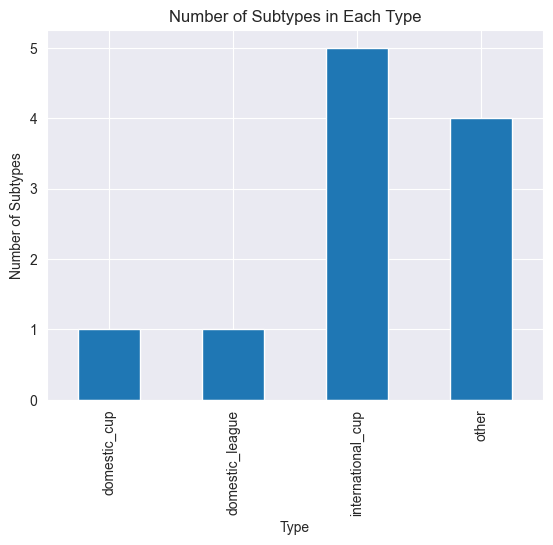

In [19]:
subtypes_per_type.plot(kind = 'bar', title = 'Number of Subtypes in Each Type')
plt.title('Number of Subtypes in Each Type')
plt.xlabel('Type')
plt.ylabel('Number of Subtypes')
plt.show()

In [20]:
df.loc[df['sub_type'] == 'league_cup']

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation
18,CGB,efl-cup,efl-cup,league_cup,other,189,England,GB1,europa


In [21]:
df.loc[df['sub_type'] == 'fifa_club_world_cup'] 

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation
31,KLUB,fifa-klub-wm,fifa-klub-wm,fifa_club_world_cup,other,-1,NaN,NaN,europa


In [22]:
# How many competitions are there in each country?
df['country_name'].value_counts()

country_name
England        4
Italy          3
Netherlands    3
Portugal       3
Russia         3
Spain          3
Ukraine        3
Germany        3
Greece         2
Denmark        2
France         2
Belgium        2
Scotland       2
Turkey         1
Name: count, dtype: int64

C:\Users\Daimo\AppData\Local\Temp\ipykernel_21880\3391649761.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(df['country_name'].unique()))  # Get a colormap with enough colors for each unique country name


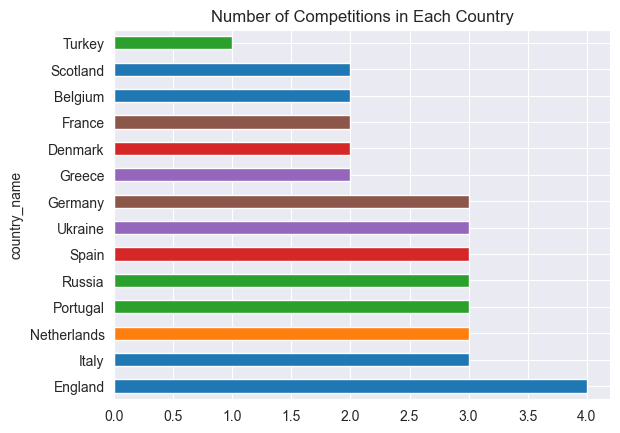

In [23]:

colors = plt.cm.get_cmap('tab10', len(df['country_name'].unique()))  # Get a colormap with enough colors for each unique country name
color_dict = {country: colors(i) for i, country in enumerate(df['country_name'].unique())}  # Create a dictionary mapping country names to colors

# Plotting
df['country_name'].value_counts().plot(kind='barh', title='Number of Competitions in Each Country', color=[color_dict[country] for country in df['country_name']])
plt.show()

In [24]:
# How many competitions are there in each confederation?
df['confederation'].value_counts()

confederation
europa    43
Name: count, dtype: int64

In [25]:
# Number of different confederations?
df['confederation'].nunique()
# it's only 1 so, probably I should delete this column

1

In [26]:
# What are the different types of competitions in each country?
df.groupby('country_name')['type'].value_counts()

country_name  type           
Belgium       domestic_league    1
              other              1
Denmark       domestic_league    1
              domestic_cup       1
England       other              2
              domestic_league    1
              domestic_cup       1
France        other              1
              domestic_league    1
Germany       other              1
              domestic_league    1
              domestic_cup       1
Greece        domestic_league    1
              domestic_cup       1
Italy         other              1
              domestic_league    1
              domestic_cup       1
Netherlands   domestic_league    1
              other              1
              domestic_cup       1
Portugal      domestic_cup       1
              domestic_league    1
              other              1
Russia        domestic_cup       1
              domestic_league    1
              other              1
Scotland      domestic_cup       1
              domestic_le

In [27]:
# How many different types of competitions are there in each country?
df.groupby('country_name')['type'].nunique()

country_name
Belgium        2
Denmark        2
England        3
France         2
Germany        3
Greece         2
Italy          3
Netherlands    3
Portugal       3
Russia         3
Scotland       2
Spain          3
Turkey         1
Ukraine        3
Name: type, dtype: int64

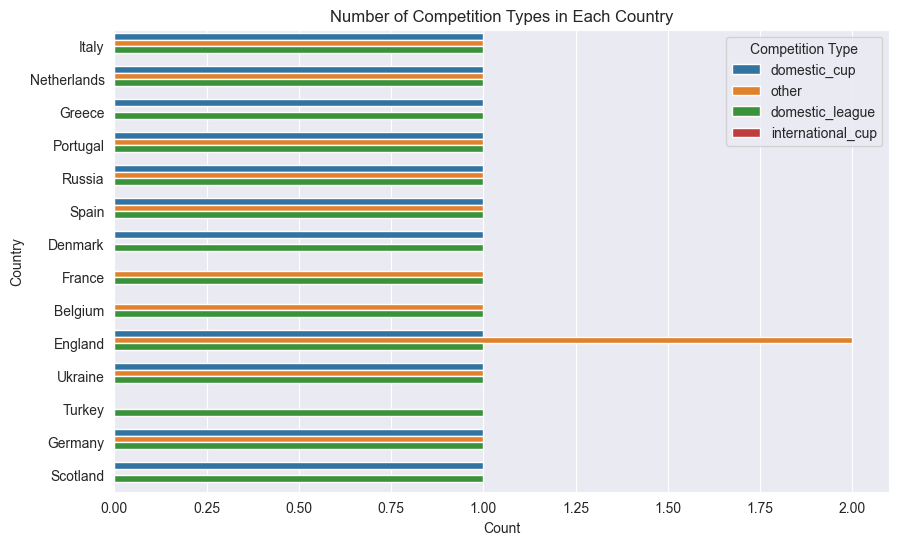

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(y='country_name', hue='type', data=df, palette='tab10')
plt.title('Number of Competition Types in Each Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.legend(title='Competition Type')
plt.show()

In [29]:
df.columns

Index(['competition_id', 'competition_code', 'name', 'sub_type', 'type',
       'country_id', 'country_name', 'domestic_league_code', 'confederation'],
      dtype='object')